Image Enhancement - Image Histogram


Import required packages necessary for image processing.

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

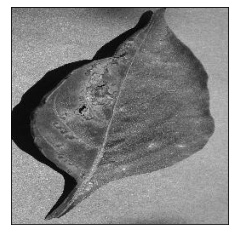

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Dataset/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___Bacterial_spot/0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG', 0)
plt.imshow(img, cmap='gray'), plt.grid(False)
plt.xticks([]), plt.yticks([])

1-Histogram of an image

cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

images : it is the source image of type uint8 or float32. it should be given in square brackets, ie, "[img]".

channels : it is also given in square brackets. It is the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0], [1] or [2] to calculate histogram of blue, green or red channel respectively.

mask : mask image. To find histogram of full image, it is given as "None". But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask. (I will show an example later.)

histSize : this represents our BIN count. Need to be given in square brackets. For full scale, we pass [256].

ranges : this is our RANGE. Normally, it is [0,256].

Text(0, 0.5, 'Frequency')

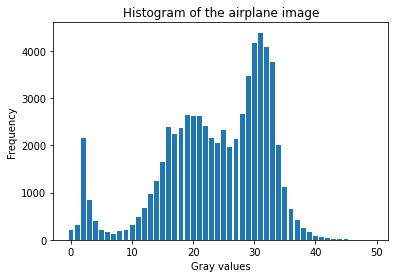

In [ ]:
hist = cv2.calcHist([img],[0],None,[50],[0,256])

# different methods for displaying a histogram
plt.bar(range(50), hist.ravel())
plt.title('Histogram of the airplane image')
plt.xlabel('Gray values')
plt.ylabel('Frequency')

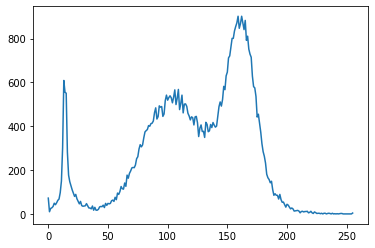

In [ ]:
# Another method
hist,bins = np.histogram(img.ravel(),256,[0,256])
plt.plot(hist)

In [ ]:
# Let's read two other images
high = cv2.imread('/content/drive/MyDrive/Dataset/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___Bacterial_spot/006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG')
low = cv2.imread('/content/drive/MyDrive/Dataset/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set/Pepper,_bell___Bacterial_spot/00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG')

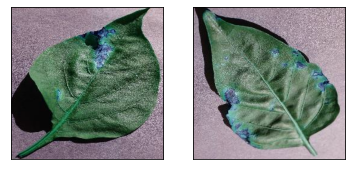

In [ ]:
# show images
plt.subplot(121), plt.imshow(high)
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(low)
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.show()

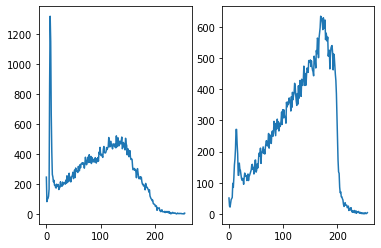

In [ ]:
# Calculate histogram of both images for the last channel.
# Channels can differ from 0 to 2.
hist_high = cv2.calcHist([high],[2],None,[256],[0,256])
hist_low = cv2.calcHist([low],[2],None,[256],[0,256])

# Plot histograms
plt.subplot(121)
plt.plot(hist_high)

plt.subplot(122)
plt.plot(hist_low)

plt.show()

2-Cumulative histogram of an image

Calculate cumulative distribution function (CDF) of an image

The cumulative histogram of an image is produced by calculating the cumulative sum of that image's histogram. There is no specific function in OpenCV to obtain the CDF of an image; thus we use the cumsum function in Numpy.

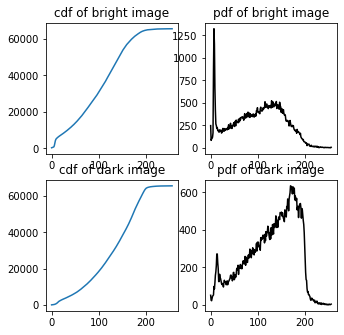

In [ ]:
cdf_low = hist_low.cumsum()
cdf_high = hist_high.cumsum()

# plot cumulative histograms
plt.subplot(221), plt.plot(cdf_high), plt. title('cdf of bright image')
plt.subplot(222), plt.plot(hist_high, 'k'), plt. title('pdf of bright image')

plt.subplot(223), plt.plot(cdf_low), plt. title('cdf of dark image')
plt.subplot(224), plt.plot(hist_low, 'k'), plt. title('pdf of dark image')

# adjust the placement of subplots
plt.subplots_adjust(bottom=2, right=0.8, top=3)

plt.show()

3-Histogram manipulation

In order to continue image manipulation, first of all, we change the RGB images to grayscale using cv2.cvtColor().

In [ ]:
low_gray = cv2.cvtColor(low, cv2.COLOR_BGR2GRAY)
high_gray = cv2.cvtColor(high, cv2.COLOR_BGR2GRAY)

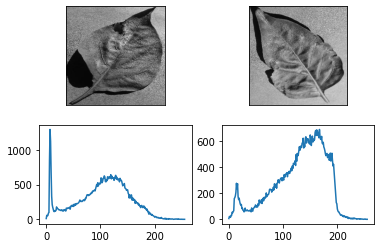

In [ ]:
# show images and their histograms
plt.subplot(221), plt.imshow(high_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(223), plt.plot(cv2.calcHist([high_gray],[0],None,[256],[0,256]))

plt.subplot(222), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
plt.subplot(224), plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256]))

plt.show()

3-1 Brightness

In order to change the brightness and contrast of an image, two parameters are often used as  and  for contrast and brightness, respectively.


manip_image(image, alpha, beta) function gets  and  and produces the output image.

Below, we just manipulate the brightness value () and leave . We will return to changing  in the next section;  will manipulate image contrast.

In [ ]:
# Define a function to easily handle manipulation.
def manip_image(image, alpha, beta):
  
  new_image = np.zeros(image.shape, image.dtype)
  
  for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        new_image[y,x] = np.clip(alpha*image[y,x] + beta, 0, 255)
  
  return new_image

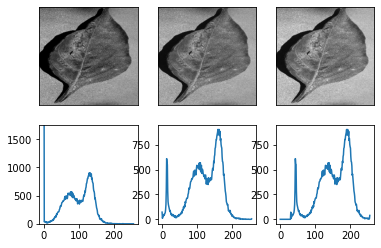

In [ ]:
# Test on the image
bright = manip_image(img, 1, 30)
dark = manip_image(img, 1, -30)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([dark],[0],None,[256],[0,256])), plt.ylim((0, 1750))

plt.subplot(235)
plt.plot(cv2.calcHist([img],[0],None,[256],[0,256]))

plt.subplot(236)
plt.plot(cv2.calcHist([bright],[0],None,[256],[0,256]))

You can see the histogram forward and backward shifts. When we increase and decrease brightness, histogram moves to brighter and darker regions, respectively.

([<matplotlib.lines.Line2D at 0x7fa608f9f210>], (0.0, 1100.0))

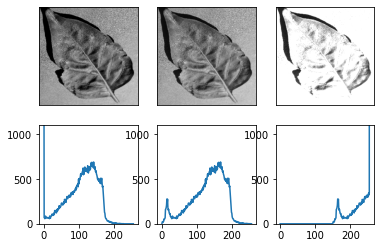

In [ ]:
# Test on the dark image
l_bright = manip_image(low_gray, 1, 150)
l_dark = manip_image(low_gray, 1, -25)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(l_dark, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(low_gray, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(l_bright, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])
 
plt.subplot(234)
plt.plot(cv2.calcHist([l_dark],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(235)
plt.plot(cv2.calcHist([low_gray],[0],None,[256],[0,256])), plt.ylim((0, 1100))

plt.subplot(236)
plt.plot(cv2.calcHist([l_bright],[0],None,[256],[0,256])), plt.ylim((0, 1100))

3-2 Contrast

Contrast of an image could be defined in different ways. One simple rule of thumb is to behave contrast as the distance between largest and smallest values in an image. In fact, the more the gray values are distributed over the  range, the more the contrast will be.

A uniform histogram with values distributed uniformly all over the intensity range will have the highest contrast. This will be the concept of our next section, Histogram equalization.

(0.0, 1750.0)

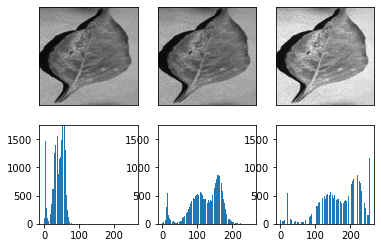

In [ ]:
# Test on the image
increase_contrast = manip_image(img, 1.35, 0)
decrease_contrast = manip_image(img, 0.35, 0)

# Compare the results
plt.figure()
plt.subplot(231), plt.imshow(decrease_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(232), plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])


plt.subplot(233),plt.imshow(increase_contrast, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(234)
plt.bar(range(256), 
        cv2.calcHist([decrease_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(235)
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))

plt.subplot(236)
plt.bar(range(256),
        cv2.calcHist([increase_contrast],[0],None,[256],[0,256]).ravel())
plt.ylim((0, 1750))


Histogram equalization

One usual method to stretch the intensity values of an image in order to make its histogram similar to the perfect histogram shape (uniformly distributed), is the histogram equalization. In this method, image histogram will be stretched with respect to its cumulative distribution function. Very good explanation of histogram equalization is found in here.

cv2.equalizeHist(src[, dst])

src : the only required argument is the original image to be equalized.

<BarContainer object of 256 artists>

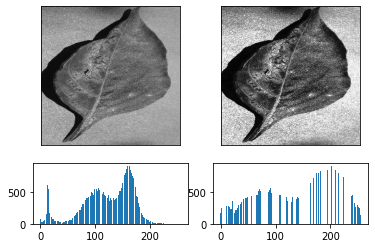

In [ ]:
img_eq = cv2.equalizeHist(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_eq, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_eq],[0],None,[256],[0,256]).ravel())

CLAHE (Contrast Limited Adaptive Histogram Equalization)

As you can see above, some parts of the image are brighter than the other parts in the equalized image. In order to reduce these artifacts in image enhancement, an adaptive algorithm was developed. This algorithm performs the same histogram equalization, but in small tiles of the image; resulting in better visual feelings.

To perform CLAHE, a CLAHE object should be created first. Then it is applied over the image. Two parameters, the tile number and limit should be specified.

You can try different tile sizes and limits and check the enhancement of image.

<BarContainer object of 256 artists>

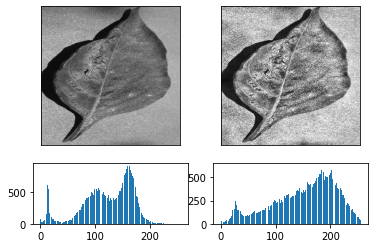

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(16, 16))
img_cl = clahe.apply(img)

grid = plt.GridSpec(3, 4, wspace=0.4, hspace=0.3)

plt.subplot(grid[:2, :2])
plt.imshow(img, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[:2, 2:])
plt.imshow(img_cl, cmap='gray')
plt.grid(False), plt.xticks([]), plt.yticks([])

plt.subplot(grid[2, :2])
plt.bar(range(256),
        cv2.calcHist([img],[0],None,[256],[0,256]).ravel())

plt.subplot(grid[2, 2:])
plt.bar(range(256),
        cv2.calcHist([img_cl],[0],None,[256],[0,256]).ravel())